# Vertical structure

This notebook demonstrates how to create a zonal mean warming pattern in the atmosphere

### Import packages and define fucntions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


## Open the 3D fields and compute the differences 

In [2]:
variable_name='ta'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ta/gn/v20190510/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'

filename_b='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/ta/gn/v20190406/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'


In [3]:
#This cell actually load the 3D data
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]
lev=expt_a_file['plev'][:]
expt_b_file=Dataset(filename_b)
expt_b=expt_b_file[variable_name][:]
expt_a_file.close()
expt_b_file.close()

In [4]:
# Now we take the time-averages
ta_a=np.average(expt_a,axis=0)
ta_b=np.average(expt_b,axis=0)

In [5]:
# And compute the difference between them
diff=ta_a-ta_b

#This is still 3D, so we need to compute the zonal mean
zonal_diff=np.nanmean(np.array(diff),axis=2)

## Plot a vertical profile of atmosphere

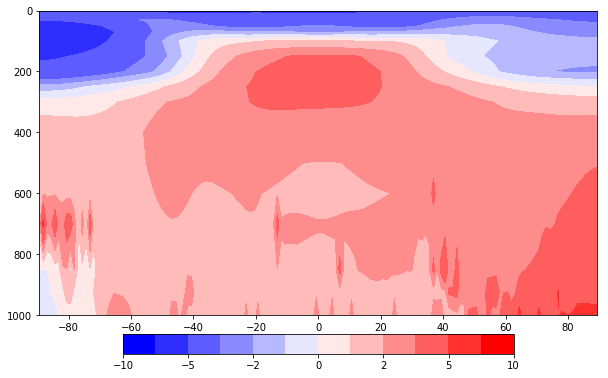

In [8]:
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale

bounds = [-10,-7,-5,-3,-2,-1,0,1,2,3,5,7,10]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)


plt.figure(figsize=(10,7))

ax = plt.axes()
fig=ax.contourf(lat,lev*0.01,np.array(zonal_diff),levels=bounds,cmap=cmap,norm=norm)
ax.invert_yaxis()


cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

This plot shows that only the troposphere is warming - the stratosphere (upper atmosphere) is cooling. The higher you go into the troposphere the more it warms, especially over the Equator. The Arctic (on the right) is warming more than the rest of the globe. 